In [13]:
import numpy as np
import pandas as pd

data = pd.read_csv("data.csv", encoding='latin1')

x = data["no2"].dropna().values

r = 102303705

a_r = 0.5 * (r % 7)
b_r = 0.3 * ((r % 5) + 1)

print("a_r =", a_r)
print("b_r =", b_r)

z = x + a_r * np.sin(b_r * x)

a_r = 0.0
b_r = 0.3


/var/folders/7x/dgpwvvh950z1lnsr3h1b_bbh0000gn/T/ipykernel_99115/1784023362.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("data.csv", encoding='latin1')


In [14]:
import torch
import torch.nn as nn
import torch.optim as optim

In [15]:
z = torch.tensor(z, dtype=torch.float32)
z = z.reshape(-1,1)

In [16]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(1, 16),
            nn.ReLU(),
            nn.Linear(16, 1)
        )

    def forward(self, x):
        return self.model(x)

In [17]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(1, 16),
            nn.ReLU(),
            nn.Linear(16, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)


In [18]:
G = Generator()
D = Discriminator()

criterion = nn.BCELoss()

optimizer_G = optim.Adam(G.parameters(), lr=0.001)
optimizer_D = optim.Adam(D.parameters(), lr=0.001)

In [19]:
epochs = 3000
batch_size = 64

for epoch in range(epochs):

    optimizer_D.zero_grad()

    real_samples = z[torch.randint(0, len(z), (batch_size,))]
    real_labels = torch.ones(batch_size, 1)

    real_output = D(real_samples)
    loss_real = criterion(real_output, real_labels)

    noise = torch.randn(batch_size, 1)
    fake_samples = G(noise)
    fake_labels = torch.zeros(batch_size, 1)

    fake_output = D(fake_samples.detach())
    loss_fake = criterion(fake_output, fake_labels)

    loss_D = loss_real + loss_fake
    loss_D.backward()
    optimizer_D.step()

    optimizer_G.zero_grad()

    noise = torch.randn(batch_size, 1)
    generated_samples = G(noise)
    labels = torch.ones(batch_size, 1)

    output = D(generated_samples)
    loss_G = criterion(output, labels)

    loss_G.backward()
    optimizer_G.step()

    if epoch % 500 == 0:
        print(f"Epoch {epoch} | D Loss: {loss_D.item():.4f} | G Loss: {loss_G.item():.4f}")


Epoch 0 | D Loss: 1.1720 | G Loss: 0.5568
Epoch 500 | D Loss: 0.7328 | G Loss: 1.2341
Epoch 1000 | D Loss: 1.3257 | G Loss: 0.7726
Epoch 1500 | D Loss: 1.3715 | G Loss: 0.8735
Epoch 2000 | D Loss: 1.2425 | G Loss: 0.9004
Epoch 2500 | D Loss: 1.2926 | G Loss: 0.8712


In [20]:
noise = torch.randn(5000, 1)
generated_z = G(noise).detach().numpy()

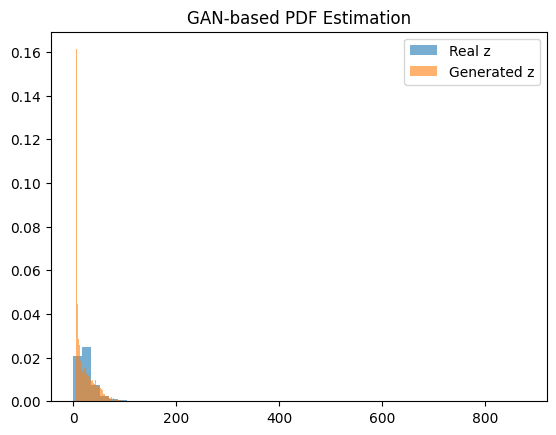

In [25]:
import matplotlib.pyplot as plt

plt.hist(z.numpy(), bins=50, density=True, alpha=0.6, label="Real z")
plt.hist(generated_z, bins=50, density=True, alpha=0.6, label="Generated z")
plt.legend()
plt.title("GAN-based PDF Estimation")
plt.savefig("figures/gan_pdf_plot.png", bbox_inches="tight")
plt.show()